In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from nltk.cluster import KMeansClusterer, euclidean_distance
import numpy as np

In [2]:
cluster.kmeans?

Object `cluster.kmeans` not found.


In [3]:
S = [
    np.array(f, dtype=np.float) for f in [
        [1, 1], [1, 4], [1.1, 2], [1, 1.1],
        [1.2,2.2],[5,1],[-1, -1], [-1, -4],
        [-5.1, -2.1],[-5.2,-0.9],[-5.1,-1.1],
        [-5,-1],[-6,2],[-6.2, 2.1],[-5,3],
        [-6, 3.1],[-6.2, 3.2],[-5.5, 3.3]
    ]
]

In [4]:
KMeansClusterer?

Init signature: KMeansClusterer(num_means, distance, repeats=1, conv_test=1e-06, initial_means=None, normalise=False, svd_dimensions=None, rng=None, avoid_empty_clusters=False)
Docstring:     
The K-means clusterer starts with k arbitrary chosen means then allocates
each vector to the cluster with the closest mean. It then recalculates the
means of each cluster as the centroid of the vectors in the cluster. This
process repeats until the cluster memberships stabilise. This is a
hill-climbing algorithm which may converge to a local maximum. Hence the
clustering is often repeated with random initial means and the most
commonly occurring output means are chosen.
Init docstring:
:param  num_means:  the number of means to use (may use fewer)
:type   num_means:  int
:param  distance:   measure of distance between two vectors
:type   distance:   function taking two vectors and returing a float
:param  repeats:    number of randomised clustering trials to use
:type   repeats:    int
:param  co

In [5]:
clusterer = KMeansClusterer(2, euclidean_distance)
clusters = clusterer.cluster(S, True, trace=True)

k-means trial 0
iteration
iteration
iteration
iteration
iteration


In [6]:
print('Clustered:', S)
print('As:', clusters)
print('Means:', clusterer.means())
print()

Clustered: [array([1., 1.]), array([1., 4.]), array([1.1, 2. ]), array([1. , 1.1]), array([1.2, 2.2]), array([5., 1.]), array([-1., -1.]), array([-1., -4.]), array([-5.1, -2.1]), array([-5.2, -0.9]), array([-5.1, -1.1]), array([-5., -1.]), array([-6.,  2.]), array([-6.2,  2.1]), array([-5.,  3.]), array([-6. ,  3.1]), array([-6.2,  3.2]), array([-5.5,  3.3])]
As: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Means: [array([1.0375, 0.7875]), array([-5.53,  1.16])]



In [7]:
def plotuj(vectors, clusters, means):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(
        [x[0] for x in vectors],
        [x[1] for x in vectors],
        c=clusters
    )
    for x in means:
        ax.scatter(x[0],x[1],s=50,c='red',marker='+')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

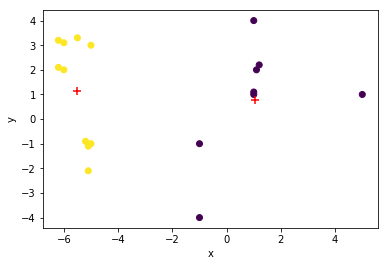

In [8]:
plotuj(S, clusters, clusterer.means())

k-means trial 0
iteration
iteration
iteration
iteration


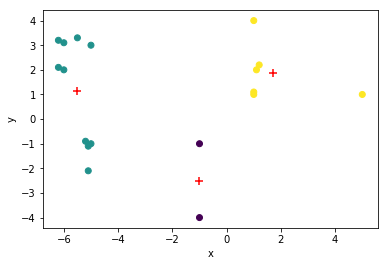

In [9]:
clusterer = KMeansClusterer(3, euclidean_distance)
clusters = clusterer.cluster(S, True, trace=True)
plotuj(S, clusters, clusterer.means())

k-means trial 0
iteration
iteration
iteration
iteration
iteration


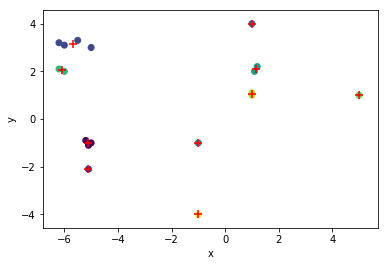

In [10]:
clusterer = KMeansClusterer(10, euclidean_distance)
clusters = clusterer.cluster(S, True, trace=True)
plotuj(S, clusters, clusterer.means())